In [ ]:
import tweepy as tw

API_KEY = 'jpsMh76nAhLYUraW4Wgb2zOqk'
API_SECRET = 'DmdhPi5XMKmVq3u4TChpxeRV1mUI1G5zRQ3Q1kuZIQOpVN8Qaw'
ACCESS_TOKEN = '1481137707166224384-FAsoE7Ez7wgvr67Hjc2dbezlzvJMuP'
ACCESS_TOKEN_SECRET = 'h4i2DfzjyebX4b8dnjzhpfSvDhDKcHieIjy619eFfaFWZ'

auth = tw.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
tweets = api.user_timeline(screen_name='POTUS', count=5, tweet_mode='extended')
tweet_texts = [tweet.full_text for tweet in tweets]
print(tweet_texts)

['My father taught me that there is no higher calling than being a good parent — and that family is the beginning, middle, and end.  \n\nHappy Father’s Day to the dads, pops, and father figures out there — and to the families that love them.', "The emancipation of enslaved Black Americans was not the end of our nation's work to deliver on the promise of equality — it was only the beginning.\n\nOn Juneteenth, we recommit to our shared work to ensure racial justice, equity, and equality in America.", 'Parents, you’ll soon be able to schedule appointments for these vaccines at places like pediatricians’ offices, children’s hospitals, community health centers and pharmacies.\n \nThese vaccines are safe and highly effective.', 'We have been preparing for this moment. Our Administration has already secured vaccine doses for America’s youngest and are now launching a comprehensive effort with states, local health departments, America’s pediatricians, family doctors, and more to help get shots

In [ ]:
tweet = tweets[3]
print("트윗의 텍스트:\n", tweet.full_text)
print("트윗의 생성시간:", tweet.created_at)
print("트윗의 리트윗 수:", tweet.retweet_count)
print("트윗의 좋아요 수:", tweet.favorite_count)

트윗의 텍스트:
 We have been preparing for this moment. Our Administration has already secured vaccine doses for America’s youngest and are now launching a comprehensive effort with states, local health departments, America’s pediatricians, family doctors, and more to help get shots into arms.
트윗의 생성시간: 2022-06-18 20:40:00
트윗의 리트윗 수: 3473
트윗의 좋아요 수: 20228


In [ ]:
import nltk
from nltk.corpus import stopwords
import re
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
stopwords_en = stopwords.words('english')

tweet = tweet.full_text.lower()
tokens = nltk.word_tokenize(tweet)
lemmatizer = nltk.stem.WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(t) for t in tokens]
tokens = [t for t in tokens if t not in stopwords_en]
tokens = [t for t in tokens if re.match('[a-z_-]+', t)]
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


['preparing', 'moment', 'administration', 'ha', 'already', 'secured', 'vaccine', 'dos', 'america', 'youngest', 'launching', 'comprehensive', 'effort', 'state', 'local', 'health', 'department', 'america', 'pediatrician', 'family', 'doctor', 'help', 'get', 'shot', 'arm']


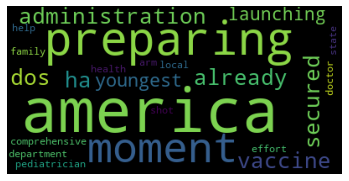

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud().generate(' '.join(tokens))
plt.imshow(wc)
plt.axis("off")
plt.show()